In [2]:
ls

MNIST.ipynb               data.csv                  knn_opendoor.ipynb
MNIST.py                  environment.yaml          knn_opendoor.py
Pandas_Review.ipynb       getkclosest.py            knn_opendoor.pyc
Pandas_Review.py          gradient_descent.py       test.py
README.md                 import pandas as pd.py    weatherHistory.csv*
Regression.ipynb          knn.ipynb                 winequality-red.csv*
Regression.py             knn.py
convex_grad_surrogate.py  knn.pyc


In [3]:
import pandas as pd
df = pd.read_csv('winequality-red.csv')

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
correlation = df.corr()
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

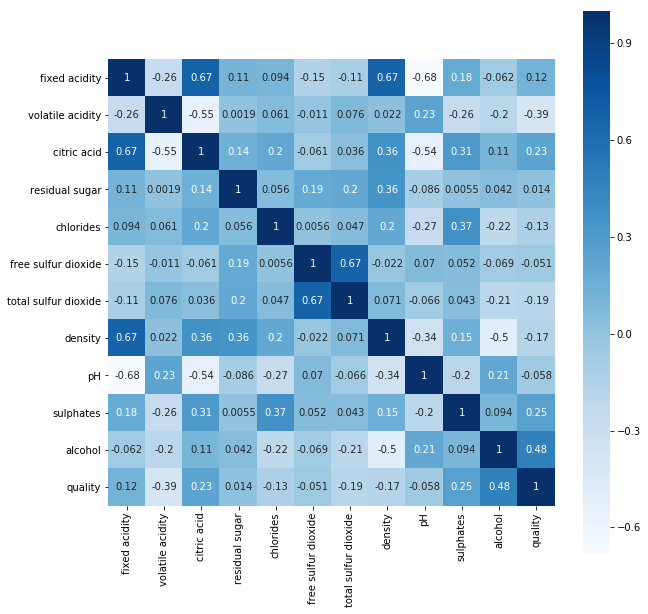

In [6]:
#Checking for correlation between different features
fig = plt.subplots(figsize=(10,10))
sns.heatmap(correlation, vmax=1.0, square=True, annot=True, cmap='Blues')

In [13]:
#It should be interesting to see how each feature regressis against the target
features = list(df)

In [15]:
features.remove('quality')
features

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

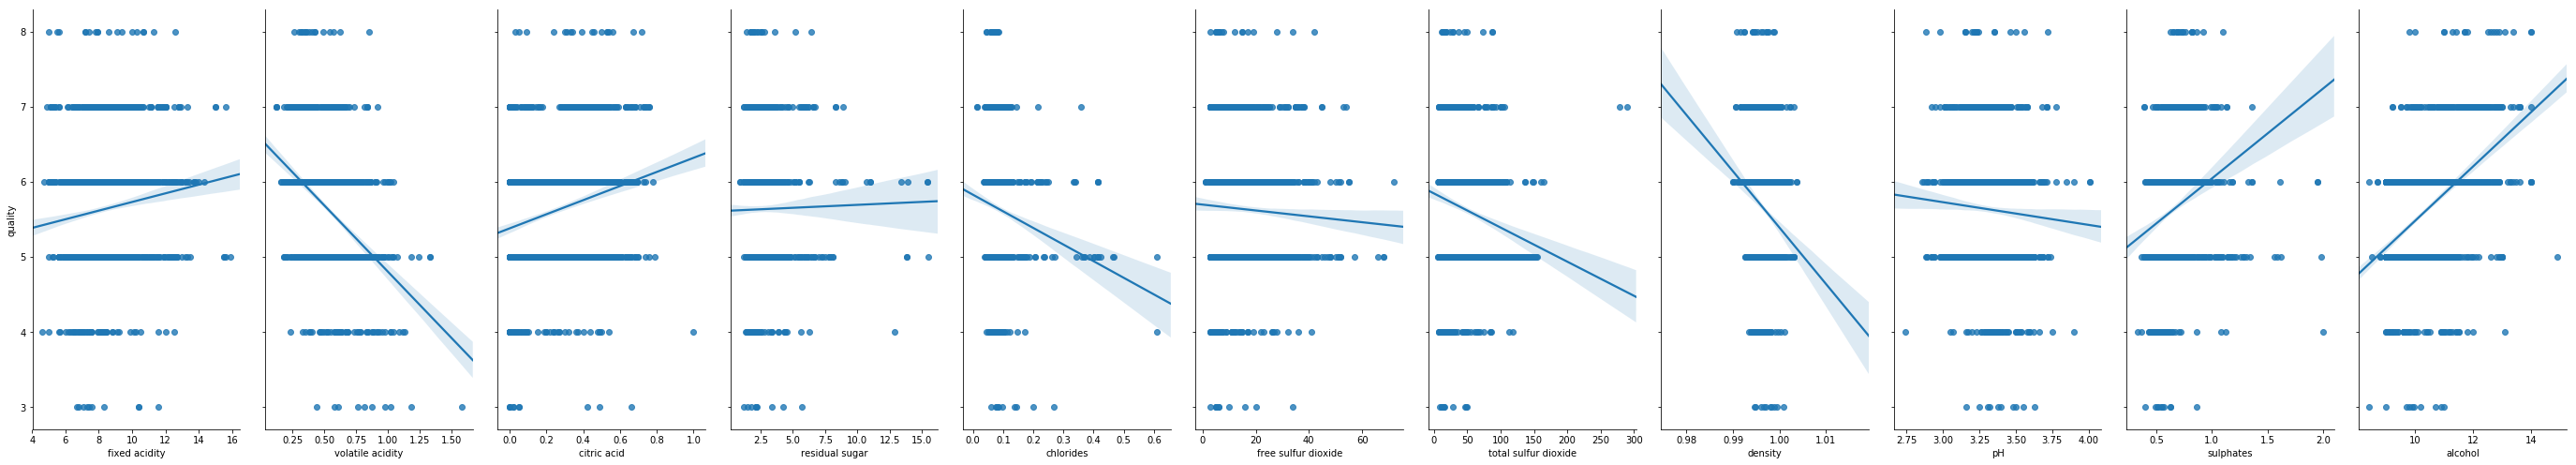

In [16]:
sns.pairplot(df, x_vars=features,y_vars='quality',kind='reg',size=7,aspect=0.5)

In [17]:
X = df.drop(columns = ['quality'])

In [18]:
y = df['quality']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
L1 = LinearRegression(n_jobs = 4)

In [23]:
L1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=4, normalize=False)

In [24]:
L1.score(X_test, y_test)

0.3207112434321937

In [28]:
accuracy = L1.score(X_test, y_test)*100
print('Accuracy = {}%'.format(int(round(accuracy))))

Accuracy = 32%


In [36]:
print('Slope = {}'.format(L1.coef_))
print('Intercept = {}'.format(round(L1.intercept_)))

Slope = [  2.02362546e-02  -1.21385635e+00  -9.84560496e-02   2.21024824e-02
  -1.89761853e+00   1.99433159e-03  -3.00386885e-03  -1.67249074e+01
  -3.97705407e-01   8.54179475e-01   2.67506351e-01]
Intercept = 21.0


In [39]:
#Calculating Mean Square Error. The lower the better!
import numpy as np
print('Mean Square Error = {}'.format(np.mean((L1.predict(X_test) - y_test) ** 2)))

Mean Square Error = 0.400780366375006


In [41]:
#Now let's see how the variance is in the model. 1 results in perfect prediction a.k.a overfitting and stuff.
print('Variance = {}'.format(accuracy/100))

Variance = 0.32071124343219365


In [43]:
#Can we improve the model with cross-validation?
from sklearn.model_selection import cross_val_score

In [49]:
score = cross_val_score(L1,X,y,cv=15,n_jobs=4)
print(score)


[-0.13428774  0.18580533  0.26290735  0.27112729  0.34515813  0.26687169
 -0.03557708  0.31297379  0.39167371  0.35104734  0.31610007  0.2830302
  0.27331392  0.28314965  0.2867465 ]


In [51]:
#Implementing R2 scores, same as calculating variance as earlier.
from sklearn.metrics import r2_score
y_pred = L1.predict(X_test)

In [52]:
print('R2 score = {}'.format(r2_score(y_test, y_pred)))

R2 score = 0.3207112434321937
